In [126]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('iris_numeric.txt',dtype=float,delimiter=",")

In [127]:
data = data[:,0:4]

In [128]:
def norm(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X = (X-mean)/std
    return X

data = norm(data)
rdata = norm(data)
clusters = [[i] for i in range(150)]


In [129]:
def euclid_dist(vec1,vec2):
    temp=0
    for i in range(len(vec1)):
        temp = temp + (vec2[i]-vec1[i])**2
    dist = np.sqrt(temp)
    return dist

def min_val(X):
    n,m=X.shape
    idx = [0,0]
    ans = 10
    for i in range(n):
        for j in range(m):
            if X[i][j]<ans:
                ans = X[i][j]
                idx[0]=i
                idx[1]=j
    return idx
    
while(len(clusters)!=3):
    dist_mat = np.array([[euclid_dist(vec1,vec2) for vec2 in data] for vec1 in data])
    np.fill_diagonal(dist_mat,10)
    idx = min_val(dist_mat)
    clusters[idx[0]].extend(clusters[idx[1]])
    clusters = np.delete(clusters,idx[1],axis=0)
    data[idx[0]] = np.mean([data[idx[0]],data[idx[1]]],axis=0)
    data = np.delete(data,idx[1],axis=0)
    

In [130]:
clear

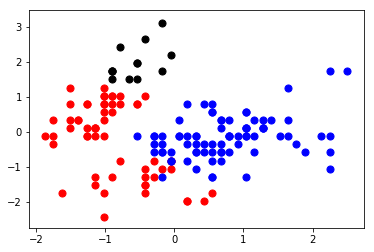

In [133]:
plt.figure()
colors = ["red","black","blue"]
for i in range(3):
    plt.scatter(rdata[clusters[i],0],rdata[clusters[i],1],c=colors[i],s=50)


(149, 4)